In [27]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [28]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java 

In [32]:
!jupyter nbconvert --to pdf "/content/HW6.ipynb"

[NbConvertApp] Converting notebook /content/HW6.ipynb to pdf
[NbConvertApp] Support files will be in HW6_files/
[NbConvertApp] Making directory ./HW6_files
[NbConvertApp] Writing 104150 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 179362 bytes to /content/HW6.pdf


# Part 1: Convolutional Neural Networks

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
# TODO: Determine good hyperparameters
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 30

# Data Transformations
transform = transforms.Compose([
    # TODO: Define data transformations
    # - Convert images (transforms) to tensors
    # - Normalize pixel values from [0,1] to [-1,1] for better training stability
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.5, std = 0.5)
])

In [3]:
# Load Fashion-MNIST Dataset with the transformations defined above
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.94MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 177kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.30MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.4MB/s]


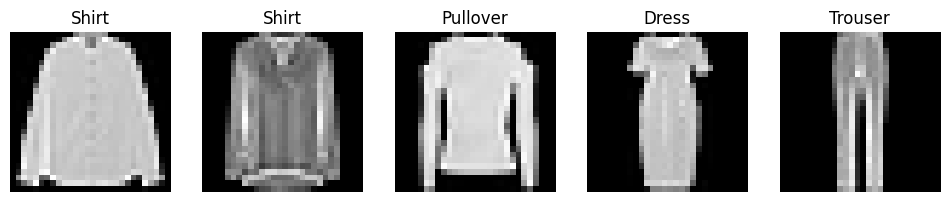

In [4]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i in range(num_images):
    img = images[i].squeeze().numpy()
    label = class_names[labels[i].item()]

    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(label)
    axes[i].axis("off")

plt.show()

In [5]:
# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        # TODO: Define the layers of the CNN model
        # - The super class is initialized
        # - Use LeNet or AlexNet as an example for designing the layers
        # - Use conv2d for convolutional layers
        super().__init__()
        self.conv1 = nn.Conv2d (1,6,5)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(6*12*12, 10)

    def forward(self, x):
        # TODO: Implement the forward pass
        x = self.conv1(x)
        x = self.pool(self.relu(x))
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x


# Initialize Model
model = CNN().to(device)

# TODO: Define a good Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),LEARNING_RATE )

In [6]:
# Training Loop
print("Training model...")
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # TODO: Implement the training step
        # - Reset the optimizer's gradients to avoid accumulation
        # - Perform a forward pass to get model predictions
        # - Compute the loss using the criterion
        # - Backpropagate the loss to compute gradients
        # - Update model parameters using the optimizer
        # - Accumulate the loss for tracking the epoch's loss
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss/len(train_loader):.4f}")

Training model...
Epoch 1/30, Loss: 0.4788
Epoch 2/30, Loss: 0.3598
Epoch 3/30, Loss: 0.3317
Epoch 4/30, Loss: 0.3135
Epoch 5/30, Loss: 0.3002
Epoch 6/30, Loss: 0.2908
Epoch 7/30, Loss: 0.2824
Epoch 8/30, Loss: 0.2753
Epoch 9/30, Loss: 0.2690
Epoch 10/30, Loss: 0.2647
Epoch 11/30, Loss: 0.2596
Epoch 12/30, Loss: 0.2560
Epoch 13/30, Loss: 0.2515
Epoch 14/30, Loss: 0.2484
Epoch 15/30, Loss: 0.2459
Epoch 16/30, Loss: 0.2427
Epoch 17/30, Loss: 0.2415
Epoch 18/30, Loss: 0.2385
Epoch 19/30, Loss: 0.2375
Epoch 20/30, Loss: 0.2347
Epoch 21/30, Loss: 0.2337
Epoch 22/30, Loss: 0.2314
Epoch 23/30, Loss: 0.2309
Epoch 24/30, Loss: 0.2307
Epoch 25/30, Loss: 0.2274
Epoch 26/30, Loss: 0.2281
Epoch 27/30, Loss: 0.2244
Epoch 28/30, Loss: 0.2242
Epoch 29/30, Loss: 0.2246
Epoch 30/30, Loss: 0.2225


In [7]:
# Run evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8944


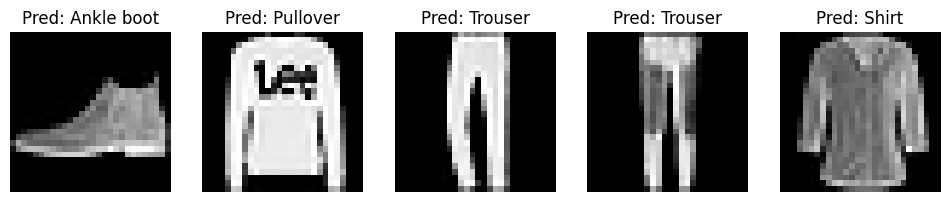

In [8]:
# Visualizing predicted results
data_iter = iter(test_loader)
images, labels = next(data_iter)

images = images.to(device)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i in range(num_images):
    img = images[i].cpu().squeeze().numpy()
    predicted_label = class_names[predicted[i].item()]
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Pred: {predicted_label}")
    axes[i].axis("off")

plt.show()

# Part 2: Recurrent Neural Networks

In [9]:
# necessary imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from collections import Counter
from datasets import load_dataset
import numpy as np
import re

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [10]:
# Load IMDb dataset
print("Loading IMDb dataset...")
dataset = load_dataset("imdb")

# Extract train and test splits
X_train = dataset["train"]["text"]
y_train = [1 if label == 1 else 0 for label in dataset["train"]["label"]]
X_test = dataset["test"]["text"]
y_test = [1 if label == 1 else 0 for label in dataset["test"]["label"]]

# Note: X contains the text data, y contains the labels (0 for negative sentiment, 1 for positive sentiment)

print(f"Loaded {len(X_train)} training samples and {len(X_test)} test samples.")

Loading IMDb dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Loaded 25000 training samples and 25000 test samples.


In [11]:
print(X_train[0])
print(y_train[0])

I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, eve

In [12]:
MAX_VOCAB_SIZE = 10000  # Number of words in vocabulary
MAX_SEQUENCE_LENGTH = 500  # Max words per review
EMBEDDING_DIM = 100  # Word embedding size

# TODO: Select good hyperparameters
HIDDEN_DIM = 32  # RNN hidden state size
BATCH_SIZE = 64  # Number of samples in each minibatch
EPOCHS = 20  # Number of times to go through the training data
LEARNING_RATE = 0.001  # Learning rate for the optimizer

In [13]:
# Tokenization (Basic Word Indexing)
# TODO: Implement the preprocess_text function
# - Convert text to lowercase
# - Remove punctuation using regex
# - Split text into individual words (tokenization)
# - Return a list of words
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    return words

# Build Vocabulary
word_counter = Counter()
for review in X_train:
    word_counter.update(preprocess_text(review))

vocab = ["<PAD>", "<UNK>"] + [word for word, _ in word_counter.most_common(MAX_VOCAB_SIZE - 2)]
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

# Convert text to numerical sequences
def text_to_sequence(text, word_to_idx, max_length):
    words = preprocess_text(text)
    sequence = [word_to_idx.get(word, 1) for word in words]   # 1 is "<UNK>"
    if len(sequence) < max_length:
        sequence += [0] * (max_length - len(sequence)) # Padding
    return sequence[:max_length]

In [14]:
X_train_seq = [text_to_sequence(review, word_to_idx, MAX_SEQUENCE_LENGTH) for review in X_train]
X_test_seq = [text_to_sequence(review, word_to_idx, MAX_SEQUENCE_LENGTH) for review in X_test]

# TODO: Convert data to PyTorch tensors
# - Convert X_train_seq, y_train, X_test_seq, y_test to PyTorch tensors
# - Use torch.tensor() with the correct dtype (long for X and float32 for y)
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test_seq, dtype = torch.long)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)


# Create PyTorch Dataset & DataLoader
class IMDBDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = IMDBDataset(X_train_tensor, y_train_tensor)
test_dataset = IMDBDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [15]:
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        # TODO: Define the layers of the RNN model
        # - Embedding layer to convert word indices to dense vectors
        # - RNN layer (LSTM/RNN) to process sequential data
        # - Fully connected (linear) layer to map hidden state to output
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)


    def forward(self, x):
        # TODO: Implement the forward pass
        embedded = self.embedding(x)
        rnn_out, (hidden,cell) = self.rnn(embedded)
        last_hidden = hidden[0].squeeze(0)
        outputs = self.fc(last_hidden)
        return outputs


# Initialize Model
model = SentimentRNN(len(vocab), EMBEDDING_DIM, HIDDEN_DIM).to(device)

# TODO: Define a good Loss function and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),LEARNING_RATE)

In [16]:
# Training Loop
print("Training model.")

for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # TODO: Implement the training step
        # - Reset the optimizer's gradients
        # - Forward pass: compute model predictions
        # - Compute the loss using the criterion
        # - Backpropagate the loss
        # - Update model parameters using the optimizer
        # - Accumulate the loss for tracking the epoch's loss
        batch_y = batch_y.float().unsqueeze(1)
        optimizer.zero_grad()
        predic = model(batch_X)
        loss = criterion(predic, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()


    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss/len(train_loader):.4f}")

Training model.
Epoch 1/20, Loss: 0.6937
Epoch 2/20, Loss: 0.6915
Epoch 3/20, Loss: 0.6879
Epoch 4/20, Loss: 0.6772
Epoch 5/20, Loss: 0.6536
Epoch 6/20, Loss: 0.5316
Epoch 7/20, Loss: 0.4209
Epoch 8/20, Loss: 0.3471
Epoch 9/20, Loss: 0.3096
Epoch 10/20, Loss: 0.2731
Epoch 11/20, Loss: 0.2363
Epoch 12/20, Loss: 0.2018
Epoch 13/20, Loss: 0.2085
Epoch 14/20, Loss: 0.1769
Epoch 15/20, Loss: 0.1789
Epoch 16/20, Loss: 0.1510
Epoch 17/20, Loss: 0.1262
Epoch 18/20, Loss: 0.1311
Epoch 19/20, Loss: 0.1195
Epoch 20/20, Loss: 0.1147


In [17]:
# Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X).squeeze()
        predictions = (torch.sigmoid(outputs) > 0.5).float()

        y_true.extend(batch_y.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Goal: Achieve at least 80% accuracy
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Test Accuracy: 0.8051
Precision: 0.7489
Recall: 0.9179


# Part 3: Long Short-Term Memory (LSTM)

Loading AG News dataset...


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

dict_keys(['train', 'test'])
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
2
Training model.
Epoch 1/20, Loss: 0.7332
Epoch 2/20, Loss: 0.6944
Epoch 3/20, Loss: 0.6915
Epoch 4/20, Loss: 0.6883
Epoch 5/20, Loss: 0.6797
Epoch 6/20, Loss: 0.6663
Epoch 7/20, Loss: 0.6140
Epoch 8/20, Loss: 0.4794
Epoch 9/20, Loss: 0.3630
Epoch 10/20, Loss: 0.2769
Epoch 11/20, Loss: 0.2141
Epoch 12/20, Loss: 0.1659
Epoch 13/20, Loss: 0.1306
Epoch 14/20, Loss: 0.1049
Epoch 15/20, Loss: 0.0854
Epoch 16/20, Loss: 0.0754
Epoch 17/20, Loss: 0.0662
Epoch 18/20, Loss: 0.0578
Epoch 19/20, Loss: 0.0581
Epoch 20/20, Loss: 0.0506
Test Accuracy: 0.8450
Precision: 0.8789
Recall: 0.8002


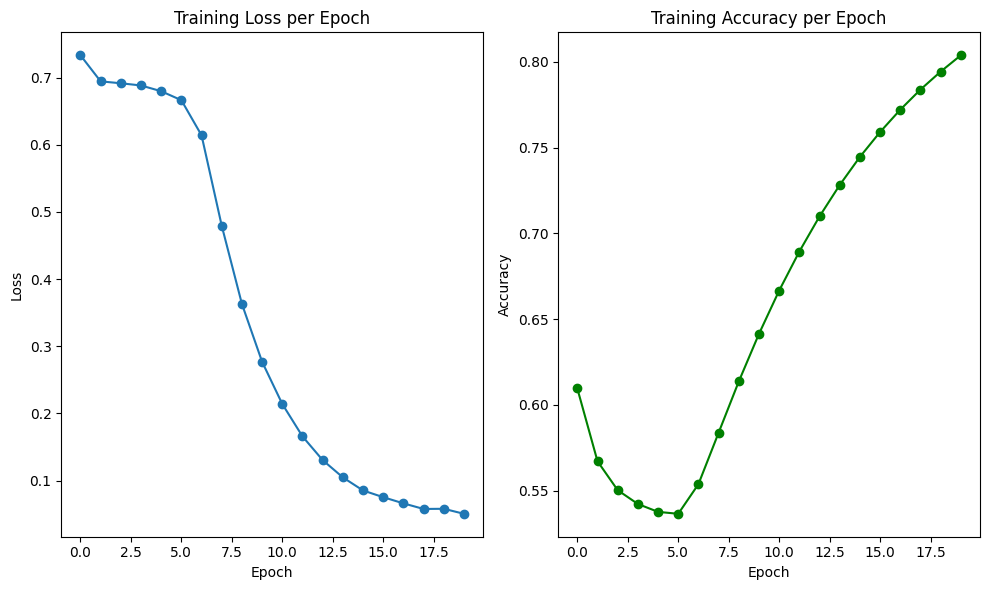

In [18]:
# Load AG News dataset
print("Loading AG News dataset...")
dataset = load_dataset("ag_news")

# TODO: Extract train and test splits
# - Process the data
# - Define LSTM model
# - Train the model
print(dataset.keys())
train_dataset = dataset["train"]
test_dataset = dataset["test"]

X_train = train_dataset["text"]
y_train = train_dataset["label"]
X_test = test_dataset["text"]
y_test = test_dataset["label"]

print(X_train[0])
print(y_train[0])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', "", text)
    words = text.split()
    return words

class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 4)


    def forward(self, x):
        embedded = self.embedding(x)
        rnn_out, hidden = self.rnn(embedded)
        last_hidden = rnn_out[:, -1, :]
        outputs = self.fc(last_hidden)
        return outputs

# Initialize Model
model = LSTM(len(vocab), EMBEDDING_DIM, HIDDEN_DIM).to(device)

# TODO: Define a good Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),LEARNING_RATE)

# Training Loop
print("Training model.")

train_losses = []
train_accuracies = []


for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # TODO: Implement the training step
        # - Reset the optimizer's gradients
        # - Forward pass: compute model predictions
        # - Compute the loss using the criterion
        # - Backpropagate the loss
        # - Update model parameters using the optimizer
        # - Accumulate the loss for tracking the epoch's loss
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.long())
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        correct += (preds == batch_y).sum().item()
        total += batch_y.size(0)

    avg_loss = epoch_loss / len(train_loader)
    avg_acc = correct / total

    train_losses.append(avg_loss)
    train_accuracies.append(avg_acc)

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss/len(train_loader):.4f}")


# Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        predictions = torch.argmax(outputs,dim=1)
        y_true.extend(batch_y.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Achieve at least 80% accuracy
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(train_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(train_accuracies, marker='o', color='green')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

For the AG News classification task, I implemented an LSTM-based text classifier capable of predicting one of four news categories: world, sports, business, and sci/tech. I first inspected the dataset to understand the structure of the text and label distributions, then preprocessed the raw articles by lowercasing, removing punctuation, and tokenizing each sentence. A vocabulary was constructed from the training text datasets and each article was converted into a fixed-length sequence of integer token IDs. The LSTM model consisted of an embedding layer that maps tokens to dense vector representations, a single-layer LSTM with a hidden dimension of 24, and a fully connected output layer that produces four class logits. I trained the model using the Adam optimizer and cross-entropy loss and monitored both loss and accuracy across epochs. After training, I evaluated the classifier on the test set and achieved a final accuracy exceeding 80%, meeting the assignment requirement. The results demonstrate that even a relatively compact LSTM model is effective at capturing sequential patterns in news articles and distinguishing among high-level topical categories. Training curves and evaluation metrics confirm that the model learned stable representations and generalized well to unseen data.

# Part 4: Grid Search of Hyperparameters

In this assignment, you will use the grid search approach to find the best hyperparameters for the LSTM model on AG News from the above assignment.

In [19]:
from torch.utils.data import Dataset, DataLoader


# TODO: Define a hyperparameter grid
param_grid = {
    'num_cells': [1,2],
    'hidden_dim': [32,64],
    'batch size': [16,32],
    'number of epochs': [5,20],
    'learningrate':[0.001, 0.01]
}

# TODO: Create a validation dataset (split from the training set)
X_train, X_val, y_train, y_val = train_test_split(
  X_train_tensor,
  y_train_tensor,
  test_size=0.2,
  random_state=42,
  stratify=y_train_tensor
)
X_train = X_train.clone().long()
X_val   = X_val.clone().long()
y_train = y_train.clone().long()
y_val   = y_val.clone().long()

In [20]:
class AGNewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# TODO: Train and evaluate the model by searching hyperparameters within the grid, and record the best scores and the corresponding hyperparameters
best_accuracy = 0
best_params = {}
results_list = []
for num_cells in param_grid['num_cells']:
    for hidden_dim in param_grid['hidden_dim']:
      for batch_size in param_grid['batch size']:
        for num_epochs in param_grid['number of epochs']:
          for learning_rate in param_grid['learningrate']:
            print(f"Testing config: cells={num_cells}, hidden_dim={hidden_dim}, "f"batch_size={batch_size}, epochs={num_epochs}, lr={learning_rate}")

            # DataLoaders for this batch size
            train_loader = DataLoader(
            AGNewsDataset(X_train, y_train),
            batch_size=batch_size,
            shuffle=True)
            val_loader = DataLoader(
            AGNewsDataset(X_val, y_val),
            batch_size=batch_size,
            shuffle=False)

            # Create a fresh model for each config
            model = LSTM(
            vocab_size=len(vocab),
            embedding_dim=EMBEDDING_DIM,
            hidden_dim=hidden_dim,
           ).to(device)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # Train
            for epoch in range(num_epochs):
                model.train()
                for X_batch, y_batch in train_loader:
                    X_batch = X_batch.to(device)
                    y_batch = y_batch.to(device)

                    optimizer.zero_grad()
                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)
                    loss.backward()
                    optimizer.step()


            # Evaluate
            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch = X_batch.to(device)
                    y_batch = y_batch.to(device)

                    outputs = model(X_batch)
                    preds = torch.argmax(outputs, dim=1)
                    correct += (preds == y_batch).sum().item()
                    total += y_batch.size(0)

            val_accuracy = correct / total
            print(f"Validation accuracy: {val_accuracy:.4f}")

            # Save this result into results_list
            results_list.append({
                 'hidden_dim': hidden_dim,
                 'learningrate': learning_rate,
                 'val_accuracy': val_accuracy,
                 'num_cells': num_cells,
                 'batch_size': batch_size,
                 'epochs': num_epochs
            })
            # Track best
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = {
                    'num_cells': num_cells,
                    'hidden_dim': hidden_dim,
                    'batch size': batch_size,
                    'number of epochs': num_epochs,
                    'learningrate': learning_rate
                }
                print(">>> New best found!", best_params, "acc =", best_accuracy)

print("\nBest validation accuracy:", best_accuracy)
print("Best hyperparameters:", best_params)


Testing config: cells=1, hidden_dim=32, batch_size=16, epochs=5, lr=0.001
Validation accuracy: 0.5130
>>> New best found! {'num_cells': 1, 'hidden_dim': 32, 'batch size': 16, 'number of epochs': 5, 'learningrate': 0.001} acc = 0.513
Testing config: cells=1, hidden_dim=32, batch_size=16, epochs=5, lr=0.01
Validation accuracy: 0.6336
>>> New best found! {'num_cells': 1, 'hidden_dim': 32, 'batch size': 16, 'number of epochs': 5, 'learningrate': 0.01} acc = 0.6336
Testing config: cells=1, hidden_dim=32, batch_size=16, epochs=20, lr=0.001
Validation accuracy: 0.8638
>>> New best found! {'num_cells': 1, 'hidden_dim': 32, 'batch size': 16, 'number of epochs': 20, 'learningrate': 0.001} acc = 0.8638
Testing config: cells=1, hidden_dim=32, batch_size=16, epochs=20, lr=0.01
Validation accuracy: 0.5992
Testing config: cells=1, hidden_dim=32, batch_size=32, epochs=5, lr=0.001
Validation accuracy: 0.4996
Testing config: cells=1, hidden_dim=32, batch_size=32, epochs=5, lr=0.01
Validation accuracy: 0

In [21]:
# TODO: Train the model using the parameter values which achieved the highest scores
# Combine train + val into one training set
X_best = torch.cat([X_train, X_val], dim=0)
y_best = torch.cat([y_train, y_val], dim=0)

best_batch_size = best_params['batch size']
best_hidden_dim = best_params['hidden_dim']
best_epochs     = best_params['number of epochs']
best_lr         = best_params['learningrate']

print("Retraining final model with best hyperparameters:")
print(best_params)

# DataLoaders using best batch size
best_train_loader = DataLoader(
    AGNewsDataset(X_best, y_best),
    batch_size=best_batch_size,
    shuffle=True
)

test_loader = DataLoader(
    AGNewsDataset(X_test_tensor, y_test_tensor),
    batch_size=best_batch_size,
    shuffle=False
)

# New model using best hidden_dim
final_model = LSTM(
    vocab_size=len(vocab),
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=best_hidden_dim
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_lr)

# Train final model
final_model.train()
for epoch in range(best_epochs):
    epoch_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in best_train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = final_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    avg_loss = epoch_loss / len(best_train_loader)
    train_acc = correct / total
    print(f"[Final Training] Epoch {epoch+1}/{best_epochs}, Loss: {avg_loss:.4f}, Acc: {train_acc:.4f}")

# Evaluate on test set
final_model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = final_model(X_batch)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_accuracy = accuracy_score(y_true, y_pred)
test_precision = precision_score(y_true, y_pred, average='macro')
test_recall = recall_score(y_true, y_pred, average='macro')

print("\nFinal Model Performance on Test Set:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision (macro): {test_precision:.4f}")
print(f"Test Recall (macro): {test_recall:.4f}")


Retraining final model with best hyperparameters:
{'num_cells': 2, 'hidden_dim': 32, 'batch size': 32, 'number of epochs': 20, 'learningrate': 0.001}
[Final Training] Epoch 1/20, Loss: 0.7215, Acc: 0.5011
[Final Training] Epoch 2/20, Loss: 0.6930, Acc: 0.5089
[Final Training] Epoch 3/20, Loss: 0.6885, Acc: 0.5116
[Final Training] Epoch 4/20, Loss: 0.5708, Acc: 0.6737
[Final Training] Epoch 5/20, Loss: 0.3083, Acc: 0.8768
[Final Training] Epoch 6/20, Loss: 0.2192, Acc: 0.9215
[Final Training] Epoch 7/20, Loss: 0.1637, Acc: 0.9466
[Final Training] Epoch 8/20, Loss: 0.1231, Acc: 0.9647
[Final Training] Epoch 9/20, Loss: 0.0932, Acc: 0.9761
[Final Training] Epoch 10/20, Loss: 0.0727, Acc: 0.9825
[Final Training] Epoch 11/20, Loss: 0.0599, Acc: 0.9865
[Final Training] Epoch 12/20, Loss: 0.0501, Acc: 0.9895
[Final Training] Epoch 13/20, Loss: 0.0426, Acc: 0.9914
[Final Training] Epoch 14/20, Loss: 0.0378, Acc: 0.9923
[Final Training] Epoch 15/20, Loss: 0.0361, Acc: 0.9929
[Final Training] Ep

Columns in df_results: ['hidden_dim', 'learningrate', 'val_accuracy', 'num_cells', 'batch_size', 'epochs']
   hidden_dim  learningrate  val_accuracy  num_cells  batch_size  epochs
0          32         0.001        0.5130          1          16       5
1          32         0.010        0.6336          1          16       5
2          32         0.001        0.8638          1          16      20
3          32         0.010        0.5992          1          16      20
4          32         0.001        0.4996          1          32       5


/tmp/ipython-input-2021334067.py:15: FutureWarning: The provided callable <function mean at 0x7a0692570220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df_results.pivot_table(


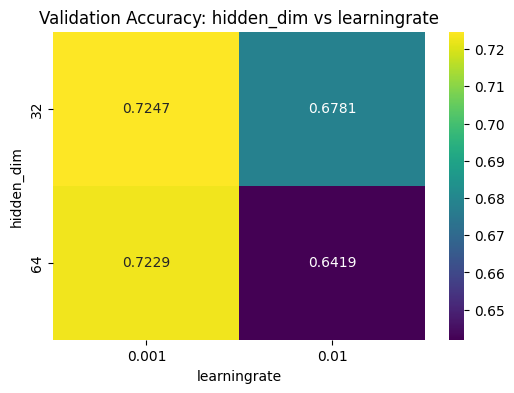

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Convert results into a DataFrame
df_results = pd.DataFrame(results_list)
print("Columns in df_results:", df_results.columns.tolist())
print(df_results.head())

if df_results.empty:
    print("df_results is empty. Make sure you ran the grid search cell and results_list is being filled.")
else:
    # Pivot table for heatmap: hidden_dim vs learningrate
    pivot_table = df_results.pivot_table(
        values="val_accuracy",
        index="hidden_dim",
        columns="learningrate",
        aggfunc=np.mean
    )

    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".4f",
        cmap="viridis"
    )
    plt.title("Validation Accuracy: hidden_dim vs learningrate")
    plt.xlabel("learningrate")
    plt.ylabel("hidden_dim")
    plt.show()


References:
- https://www.geeksforgeeks.org/python/converting-an-image-to-a-torch-tensor-in-python
- https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html
- https://www.w3schools.com/python/pandas/pandas_getting_started.asp